# Project Report: Analyzing the Relationship between Electric Vehicle Charging Infrastructure and Sales Data in Germany.

The objective of this project is to analyze the relationship between electric vehicle (EV) charging infrastructure and monthly sales data for EVs in each state of Germany. The project will use data on charging station locations and monthly sales data for every state in Germany to identify patterns and relationships between charging infrastructure and EV sales.

By analyzing this relationship, we could identify areas where improvements in charging infrastructure could lead to increased EV adoption and also the project could help city planners and transportation officials plan for the development of EV charging infrastructure more effectively.

As datasource, we need data regarding e-charging station and sales data of EV group by state. For E-charging station data we use [E-Ladesäulenregister](https://mobilithek.info/offers/-2413665570381145802) data source, which provides charging location(coordinates -> state),  and for sales data we use [KBA](https://www.kba.de/DE/Statistik/Fahrzeuge/Neuzulassungen/Umwelt/n_umwelt_node.html), provides monthly sales data for every state in Germany by German Federal Motor Transport Authority (KBA). Both are public data.

After, collecting and processing data from bath datasource we store data into sqlite db. Now, we face both data from sqlite and plot them one by one, we can easily find the difference how many charging station and load should be installed in which station.

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [12]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data
Load two data sources from sqlite, E-charging station as `df_mobi` and sales data as `df_kba`.

In [14]:
import pandas as pd

# load mobi data from db
df_mobi = pd.read_sql_table('mobi', 'sqlite:///data.sqlite')

# load kba data from db
df_kba = pd.read_sql_table('kba', 'sqlite:///data.sqlite')

In [11]:
#df_kba

## Gaps between sales data and EV e-charging avaliable in public?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


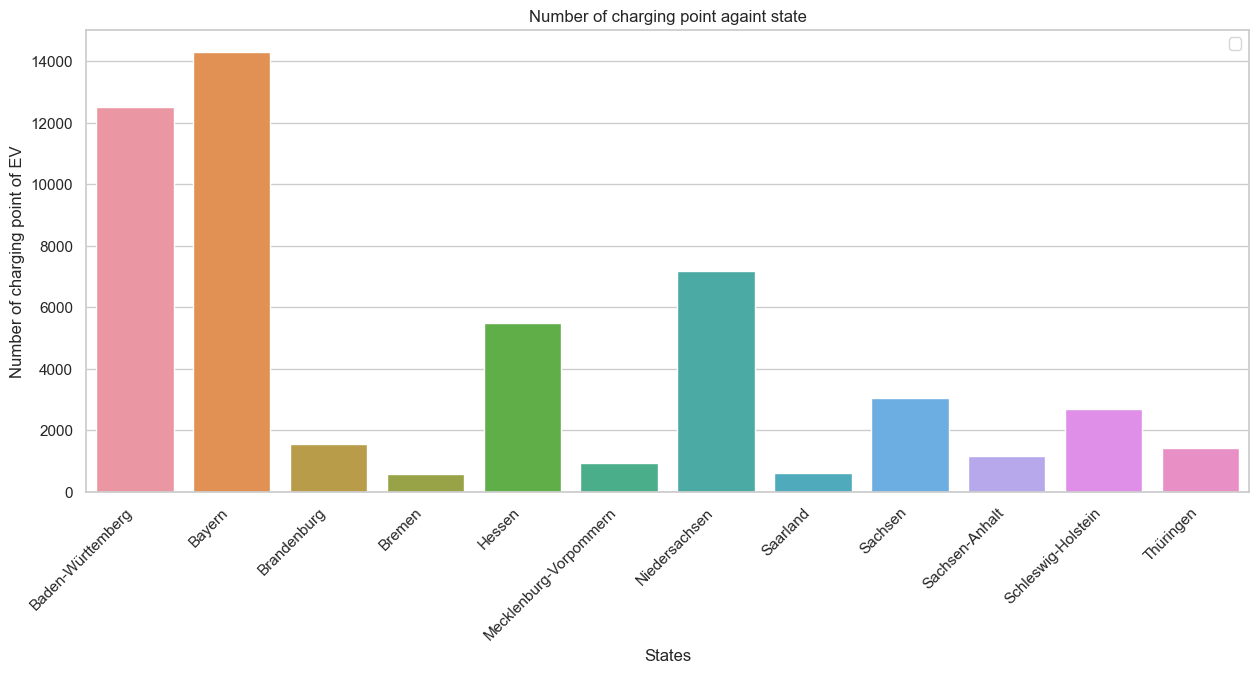

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

ax = sns.barplot(x=df_mobi['State'], y=df_mobi['number_of_charging_point'])
plt.xlabel('States')
plt.ylabel('Number of charging point of EV (unit)')
plt.title('Number of charging point againt state')
plt.legend(loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


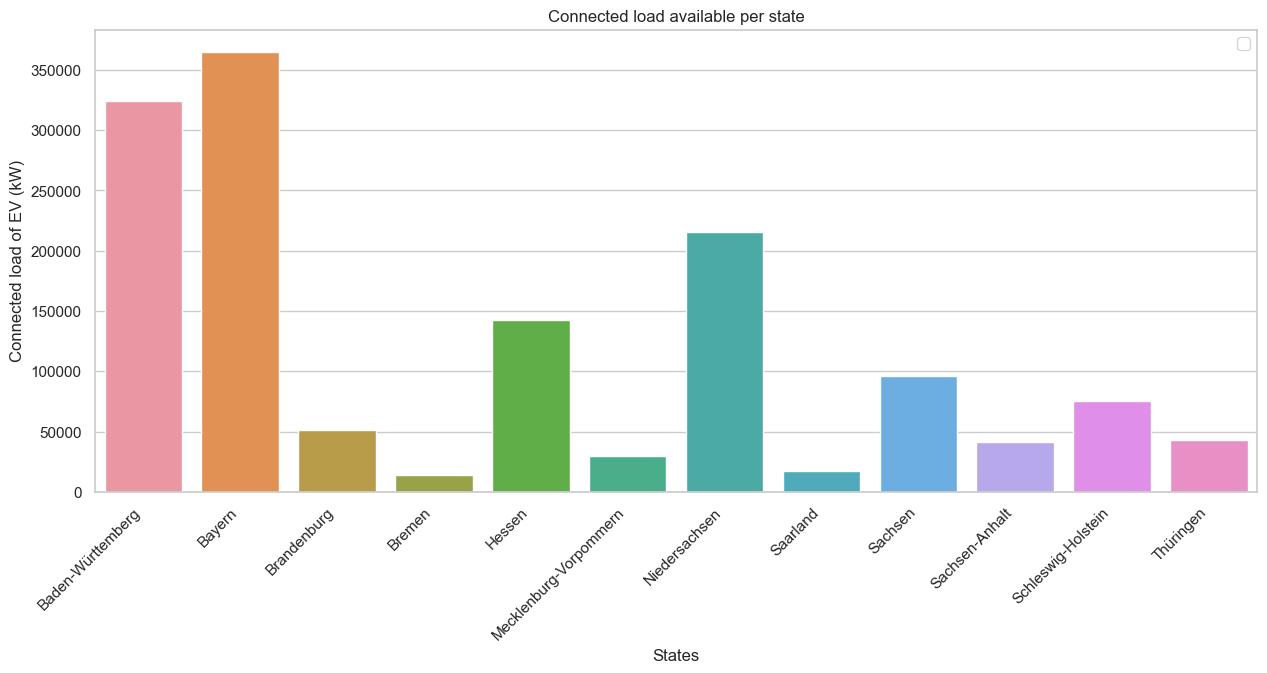

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

ax = sns.barplot(x=df_mobi['State'], y=df_mobi['connected_load'])
plt.xlabel('States')
plt.ylabel('Connected load of EV (kW)')
plt.title('Connected load available per state')
plt.legend(loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


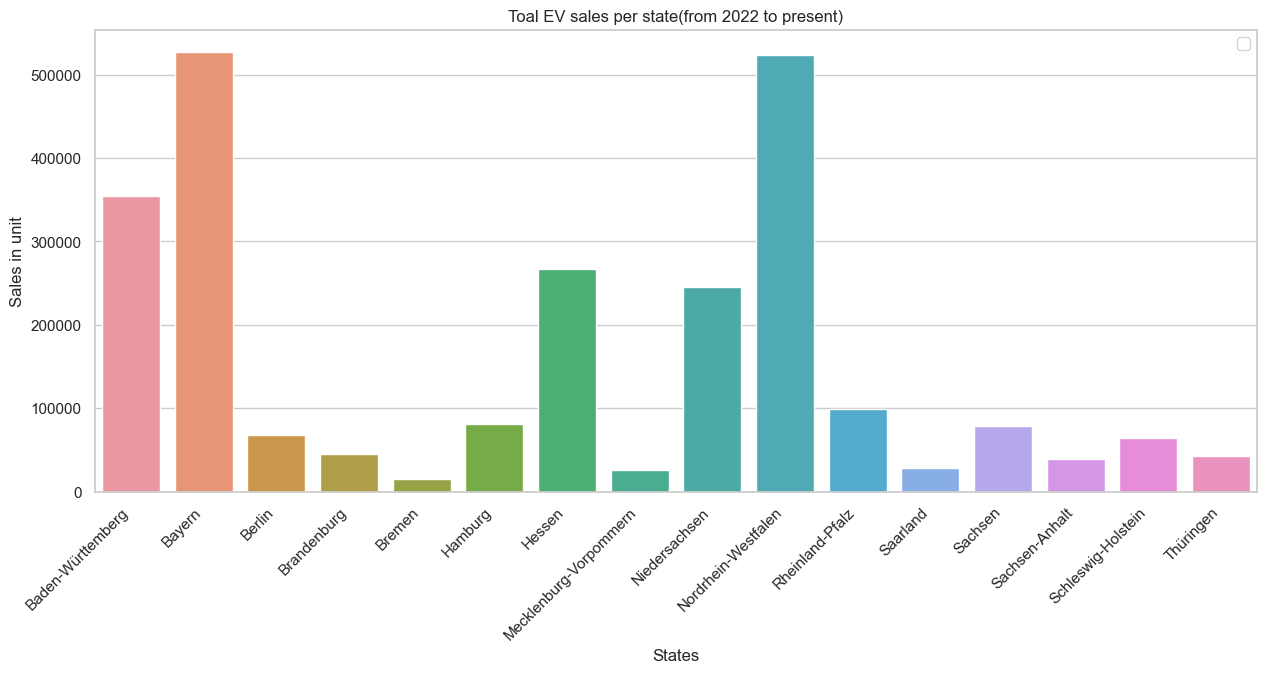

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

ax = sns.barplot(x=df_kba['State'], y=df_kba['EV Sales'])
plt.xlabel('States')
plt.ylabel('Sales in unit')
plt.title('Toal EV sales per state(from 2022 to present)')
plt.legend(loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [40]:
df_final = pd.merge(df_mobi, df_kba, on='State')
df_final = df_final.drop('connected_load', axis=1)
df_final.head()

,State,number_of_charging_point,EV Sales
0,Baden-Württemberg,12503,354052
1,Bayern,14311,527220
2,Brandenburg,1567,45290
3,Bremen,570,15417
4,Hessen,5479,267019


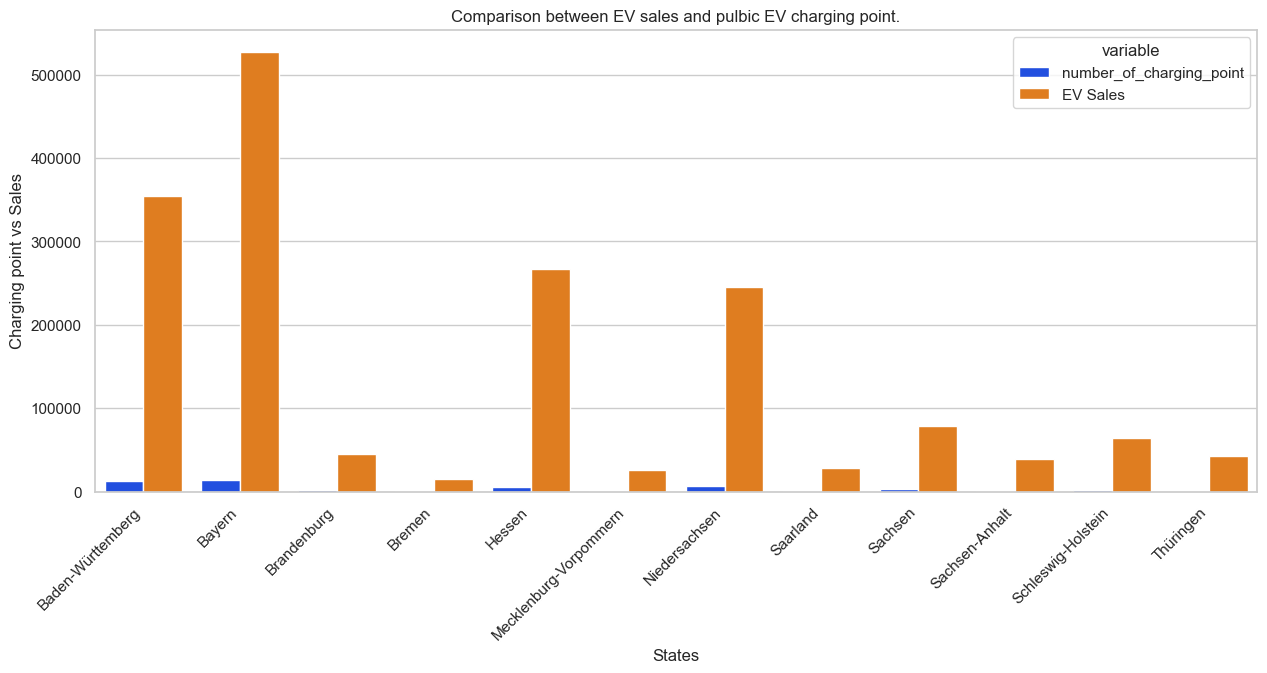

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

ax = sns.barplot(x='State', y='value', hue='variable', data=pd.melt(df_final, id_vars=['State']), palette='bright')

plt.xlabel('States')
plt.ylabel('Charging point vs Sales')
plt.title('Comparison between EV sales and pulbic EV charging point.')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

From above picture we clearly see that there is a huge gap between EV sales and avaliable public charging point. So we have to install based on that.